In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv("../data/2007_to_2024_nflfastR.csv.gz", compression="gzip", low_memory=False)
punts = df[df["play_type"] == "punt"]

In [10]:
print(punts["desc"])
print(punts["yardline_100"])
print(punts["kick_distance"])
print(punts["return_yards"])

8         (11:53) 4-A.Lee punts 33 yards to ARI 21, Cent...
20        (7:29) 5-M.Barr punts 41 yards to SF 9, Center...
25        (5:13) 4-A.Lee punts 44 yards to ARI 29, Cente...
75        (:42) 5-M.Barr punts 34 yards to SF 26, Center...
85        (13:48) 5-M.Barr punts 46 yards to SF 44, Cent...
                                ...                        
860134    (12:50) 14-M.Araiza punts 54 yards to PHI 37, ...
860153    (4:57) 14-M.Araiza punts 42 yards to PHI 34, C...
860164    (1:56) 10-B.Mann punts 43 yards to KC 6, Cente...
860175    (:34) 14-M.Araiza punts 42 yards to PHI 29, Ce...
860184    (12:09) 14-M.Araiza punts 55 yards to end zone...
Name: desc, Length: 43239, dtype: object
8         54.0
20        50.0
25        73.0
75        60.0
85        90.0
          ... 
860134    91.0
860153    76.0
860164    49.0
860175    71.0
860184    55.0
Name: yardline_100, Length: 43239, dtype: float64
8         33.0
20        41.0
25        44.0
75        34.0
85        46.0
         

In [2]:
import matplotlib.pyplot as plt

ax = punts["yardline_100"].value_counts().sort_index().plot(kind="bar", figsize=(12, 6))
ax.set_xlabel("Yards from opponent's end zone (yardline_100)")
ax.set_ylabel("Number of punts")
ax.set_title("Punt Frequency by Field Position")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'punts' is not defined

In [5]:
punts = punts.copy()
punts["expected_opponent_yardline"] = 100 - punts["yardline_100"] + punts["kick_distance"] - punts["return_yards"]

<Axes: xlabel='yardline_100'>

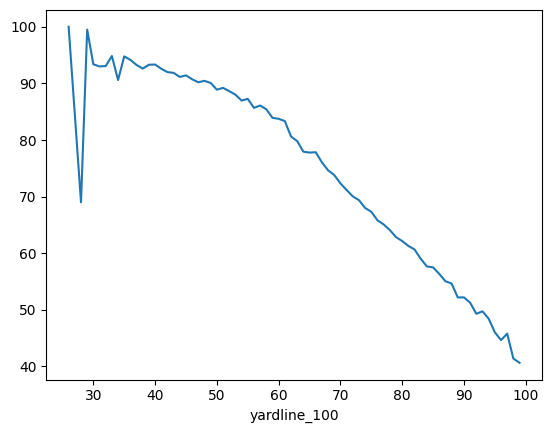

In [6]:
# Group by punt yardline
avg_result = punts.groupby("yardline_100")["expected_opponent_yardline"].mean()
avg_result.plot()

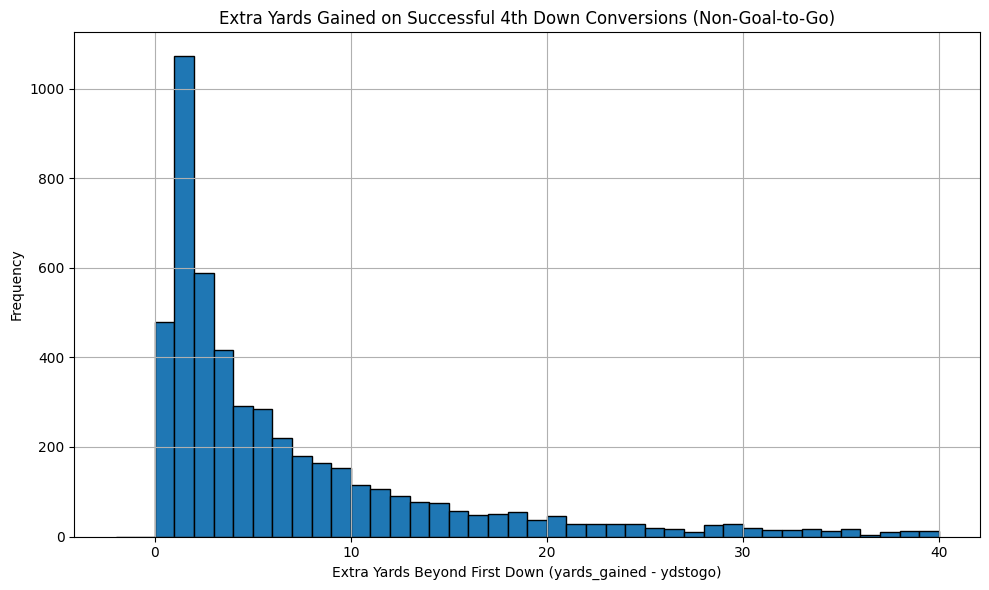

In [7]:
# Filter for 4th down, not goal-to-go, successful conversion
converted_4th_downs = df[
    (df["down"] == 4) &
    (df["goal_to_go"] == 0) &
    (df["yards_gained"] >= df["ydstogo"]) &
    (df["play_type"].isin(["run", "pass"]))
].copy()

# Compute extra yards beyond first down
converted_4th_downs["extra_yards"] = converted_4th_downs["yards_gained"] - converted_4th_downs["ydstogo"]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(converted_4th_downs["extra_yards"], bins=range(-2, 41), edgecolor="black")
plt.title("Extra Yards Gained on Successful 4th Down Conversions (Non-Goal-to-Go)")
plt.xlabel("Extra Yards Beyond First Down (yards_gained - ydstogo)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

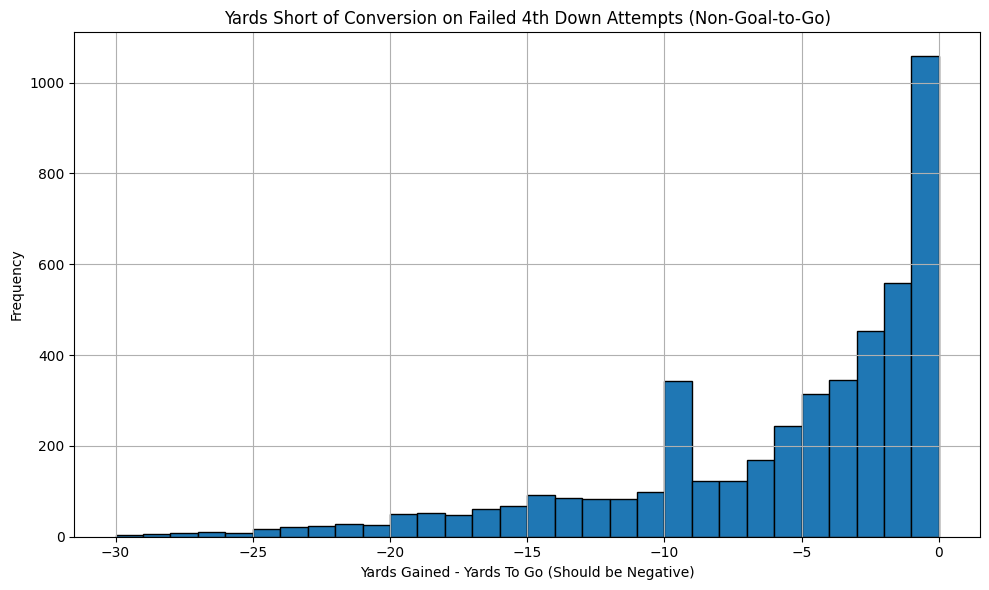

In [8]:
# Filter for 4th down, not goal-to-go, and failed conversion
failed_4th_downs = df[
    (df["down"] == 4) &
    (df["goal_to_go"] == 0) &
    (df["yards_gained"] < df["ydstogo"]) &
    (df["play_type"].isin(["run", "pass"]))
].copy()

# Compute yards short of conversion
failed_4th_downs["yards_short"] = failed_4th_downs["yards_gained"] - failed_4th_downs["ydstogo"]

plt.figure(figsize=(10, 6))
plt.hist(failed_4th_downs["yards_short"], bins=range(-30, 1), edgecolor="black")
plt.title("Yards Short of Conversion on Failed 4th Down Attempts (Non-Goal-to-Go)")
plt.xlabel("Yards Gained - Yards To Go (Should be Negative)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()